In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Imports the whole external wealth of nation dataset

ewn = pd.read_excel('EWN-dataset_12-2022.xlsx', sheet_name='Dataset')

In [3]:
# Picks data from Italy, US and China and keeps only NIIP columns (excluding gold)

it_ewn = ewn[ewn['Country']=='Italy'].reset_index(drop=True)[['Country', 'Year', 'Net IIP excl gold', 'net IIP excl gold / GDP domestic currency']]
chn_ewn = ewn[ewn['Country']=='China'].reset_index(drop=True)[['Country', 'Year', 'Net IIP excl gold', 'net IIP excl gold / GDP domestic currency']]
us_ewn = ewn[ewn['Country']=='United States'].reset_index(drop=True)[['Country', 'Year', 'Net IIP excl gold', 'net IIP excl gold / GDP domestic currency']]

In [5]:
ca = pd.read_excel('CA data.xlsx')

In [6]:
it_ca = ca[ca['Country']=='Italy'].reset_index(drop=True)
chn_ca = ca[ca['Country']=='China'].reset_index(drop=True)
us_ca = ca[ca['Country']=='United States'].reset_index(drop=True)

In [7]:
# Deletes empty years from the dataframes

data_list = [it_ewn,chn_ewn,us_ewn, it_ca, chn_ca,us_ca]
for el in data_list:
    el.dropna(inplace=True)
    el.reset_index(drop=True, inplace=True)



In [11]:
it_ewn = it_ewn[it_ewn['Year']>=1980]
us_ewn = us_ewn[us_ewn['Year']>=1980]
chn_ewn = chn_ewn[chn_ewn['Year']>=1997]

In [12]:
# Merges the dataframes into country specific ones
it = it_ewn.merge(it_ca, on=['Country', 'Year'])

us = us_ewn.merge(us_ca, on=['Country', 'Year'])

chn = chn_ewn.merge(chn_ca, on=['Country', 'Year'])

In [17]:
# Creates the hypothetical NIIP columns
countries = [it, us, chn]
for c in countries:
    c['Cumulative CA'] = c['Current account Balance'].cumsum()
    c['Cumulative CA (%GDP)'] = c['Current Account balance (%GDP)'].cumsum()
    c['Hypothetical NIIP'] = c['Cumulative CA'] + c.at[0, 'Net IIP excl gold']
    c['Hypothetical NIIP (%GDP)'] = c['Cumulative CA (%GDP)'] + c.at[0, 'net IIP excl gold / GDP domestic currency']
    # sets the initial value of the hypothetical NIIPs to their actual values
    c.at[0, 'Hypothetical NIIP'] = c.at[0, 'Net IIP excl gold']
    c.at[0, 'Hypothetical NIIP (%GDP)'] = c.at[0, 'net IIP excl gold / GDP domestic currency']

In [18]:
names_list = ['Italy', 'United States', 'China']

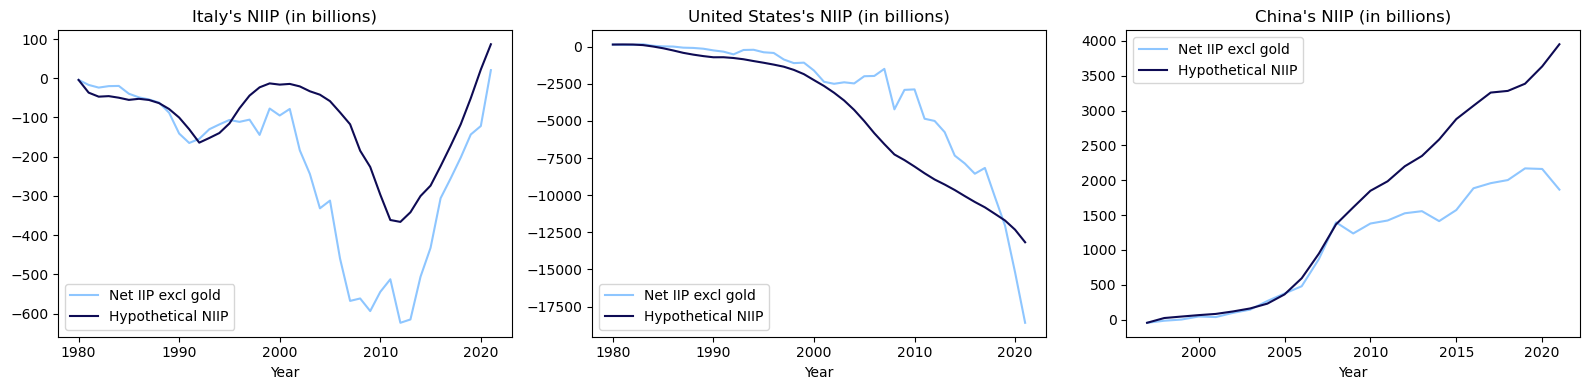

In [19]:
fig, axes = plt.subplots(1,3, figsize=(16,4))


# Nominal NIIP Graphs
for j in range(3):
    line1 = axes[j].plot(countries[j]['Year'], (countries[j]['Net IIP excl gold'])/1000000000, color='#8EC6FF',label='Net IIP excl gold')
    line2 = axes[j].plot(countries[j]['Year'], (countries[j]['Hypothetical NIIP'])/1000000000, color='#0E0B54', label='Hypothetical NIIP')
    axes[j].set_title(names_list[j]+"'s NIIP (in billions)")
    axes[j].set_xlabel('Year')
    axes[j].legend(['Net IIP excl gold','Hypothetical NIIP'])

plt.tight_layout()
plt.savefig('Nominal NIIP graphs.png')

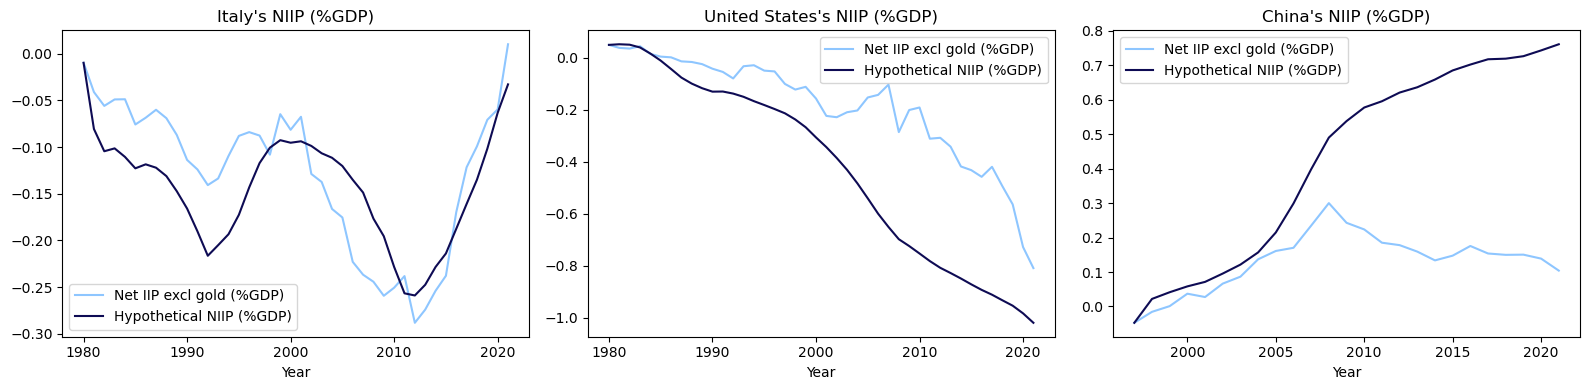

In [20]:
# %GDP NIIP graphs
fig2, axes2 = plt.subplots(1,3, figsize=(16,4))
for j in range(3):
    line3 = axes2[j].plot(countries[j]['Year'], countries[j]['net IIP excl gold / GDP domestic currency'], color='#8EC6FF', label='net IIP excl gold / GDP domestic currency')
    line4 = axes2[j].plot(countries[j]['Year'], countries[j]['Hypothetical NIIP (%GDP)'], color='#0E0B54', label='Hypothetical NIIP (%GDP)')
    axes2[j].set_title(names_list[j]+"'s NIIP (%GDP)")
    axes2[j].set_xlabel('Year')
    axes2[j].legend()
    axes2[j].legend(['Net IIP excl gold (%GDP)','Hypothetical NIIP (%GDP)'])

plt.tight_layout()
plt.savefig('%GDP NIIP graphs.png')